In [1]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from copy import deepcopy
from scipy.spatial.distance import cdist

In [2]:
#reading data into data
data = pd.read_csv('fulldatetime.csv')
print("Input data and shape")
print(type(data))
data.head()
data.shape

Input data and shape
<class 'pandas.core.frame.DataFrame'>


(576574, 7)

In [41]:
date = ['2018-02-09']
floor = 4
week = data[data.Date.isin(date)]
week = week[week.Floor.isin(floor)]
print(week.shape)
print(week['Latitude'].max())
print(week['Latitude'].min())
print(" ")
print(week['Longitude'].max())
print(week['Longitude'].min())

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [int]

In [28]:
print(week)

                                                     LUID        Date  \
53      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
54      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
55      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
56      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
57      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
58      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
59      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
60      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
61      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
62      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
63      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
64      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd29de...  2018-02-09   
65      c6032091ae7d59226544c85eb7c6ce55bd3834d2fd2

In [29]:
#2 features on which clustering should happen
f1 = week['Latitude'].values
f2 = week['Longitude'].values
print(type(f2[0]))
print(f1)

<class 'numpy.float64'>
[38.99255839 38.99255839 38.99255839 ... 38.9903658  38.99037094
 38.9903658 ]


In [30]:
#upto 5 decimal points (1.1 m)
##now doing upto 4 decimal points
for i in range(0, len(f1)):
    f1[i] = f1[i] * 10000
    f1[i] = int(round(f1[i]))

In [31]:
for i in range(0, len(f2)):
    f2[i] = f2[i] * 10000
    f2[i] = int(round(f2[i]))

In [32]:
print(max(f1))
print(min(f1))
print(min(f2))
print(max(f2))

print(f2)

389928.0
0.0
-769440.0
0.0
[-769440. -769440. -769440. ... -769363. -769364. -769363.]


In [33]:
#zipping the features
X = np.array(list(zip(f1, f2)))

[[ 389911. -769424.]
 [ 389913. -769429.]
 [ 389921. -769437.]]


Text(0.5,1,'Latitude vs Longitude (1.1 m)')

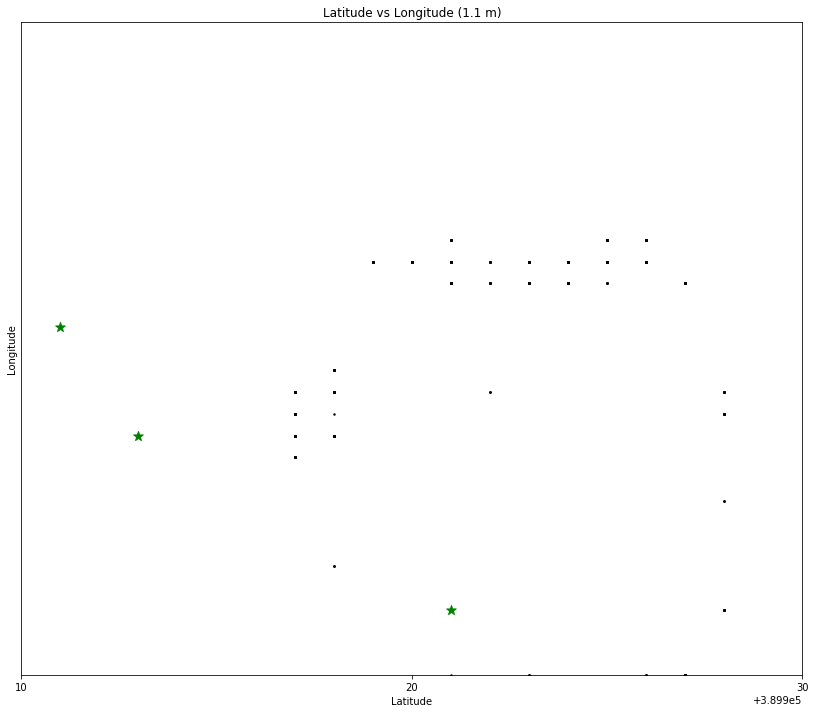

In [34]:
#Number of clusters = 3
k = 3

#Random centroids
C_x = np.random.randint(389910, 389930, size=k)
C_y = np.random.randint(-769440, -769410, size=k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(14, 12))

tick_spacingx = 10
tick_spacingy = 100
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 2)
plt.scatter(C_x, C_y, marker='*', s = 100, c='g')
plt.ylim([-769440, -769410])
plt.xlim([389910, 389930])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude (1.1 m)")

In [35]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [36]:
#To store the value of centroids when it updates
C_old = np.zeros(C.shape)
print(type(C_old))
print(C_old)
print(C)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error.min())
# newerror = error[0][0]
# print(newerror)

<class 'numpy.ndarray'>
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 389911. -769424.]
 [ 389913. -769429.]
 [ 389921. -769437.]]
1494044.4091515485


In [37]:
#Loop will run till the error becomes zero
while error.min() != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
#         print(X[i])
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    print(C)
    print(C_old)
    C_old = deepcopy(C)
    print(C_old)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(error)

[[ 389911. -769424.]
 [ 389913. -769429.]
 [ 389921. -769437.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 389911. -769424.]
 [ 389913. -769429.]
 [ 389921. -769437.]]
2062.2104
[[ 388993.94 -767576.94]
 [ 389917.88 -769426.56]
 [ 389926.72 -769434.7 ]]
[[ 389911. -769424.]
 [ 389913. -769429.]
 [ 389921. -769437.]]
[[ 388993.94 -767576.94]
 [ 389917.88 -769426.56]
 [ 389926.72 -769434.7 ]]
860517.6
[[      0.         0.  ]
 [ 389915.47 -769407.9 ]
 [ 389927.2  -769434.7 ]]
[[ 388993.94 -767576.94]
 [ 389917.88 -769426.56]
 [ 389926.72 -769434.7 ]]
[[      0.         0.  ]
 [ 389915.47 -769407.9 ]
 [ 389927.2  -769434.7 ]]
40.372776
[[      0.         0.  ]
 [ 389905.84 -769370.6 ]
 [ 389919.88 -769424.9 ]]
[[      0.         0.  ]
 [ 389915.47 -769407.9 ]
 [ 389927.2  -769434.7 ]]
[[      0.         0.  ]
 [ 389905.84 -769370.6 ]
 [ 389919.88 -769424.9 ]]
7.370033
[[      0.         0.  ]
 [ 389903.97 -769363.5 ]
 [ 389919.84 -769424.7 ]]
[[      0.         0.  ]
 [ 389905.84 -769370.6 ]
 [ 38991

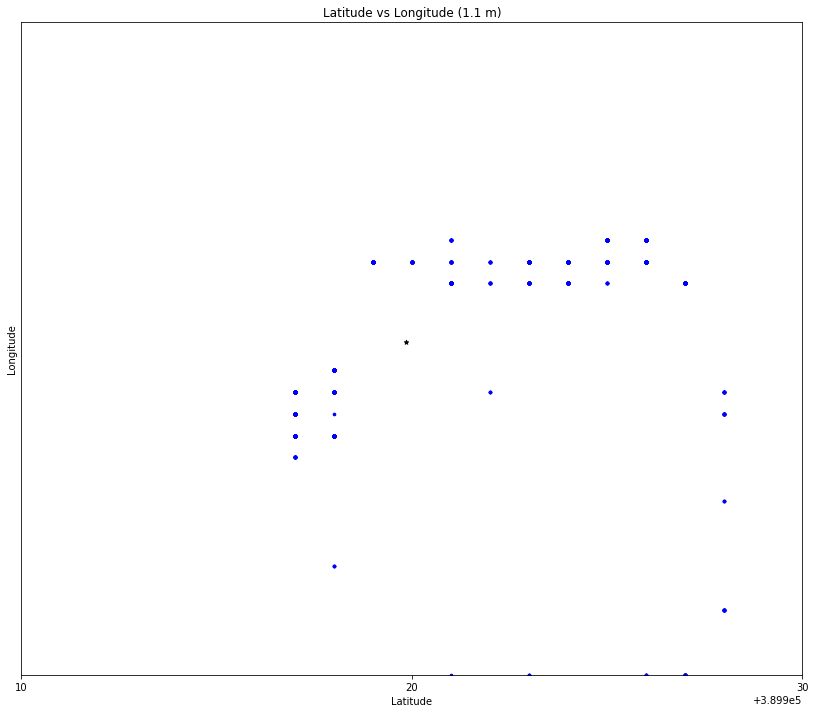

In [38]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(14, 12))

tick_spacingx = 10
tick_spacingy = 100
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 2)
plt.ylim([-769440, -769410])
plt.xlim([389910, 389930])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude (1.1 m)")

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=20, c='#050505')

In [ ]:
#Final centroid cluster
print(C)